# Procesos estócasticos / Semillero de investigacion GCPDS
### Cesar German Castellanos 



### Yessica Alejandra Gomez Rivera 



Data base: Two class motor imagery 



In [ ]:
!pip install mne
import mne
from google.colab import drive
from scipy.io import loadmat
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from ipywidgets import interact_manual

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
cd /content/gdrive/Shared drives/GCPDS - semillero/databases/Two_class_motor_imagery

/content/gdrive/Shared drives/GCPDS - semillero/databases/Two_class_motor_imagery


In [ ]:
for i in range (1,9):
  url = f'http://bnci-horizon-2020.eu/database/data-sets/002-2014/S0{i}T.mat'
  r = requests.get(url, allow_redirects=True)
  open(f'S0{i}T.mat', 'wb').write(r.content)

In [ ]:
for i in range (1,9):
  url = f'http://bnci-horizon-2020.eu/database/data-sets/002-2014/S0{i}E.mat'
  r = requests.get(url, allow_redirects=True)
  open(f'S0{i}E.mat', 'wb').write(r.content)

In [ ]:
S01T= loadmat (f"S01T") 
S01E= loadmat (f"S01E") 
S02T= loadmat (f"S02T") 
S02E= loadmat (f"S02E") 
S03T= loadmat (f"S03T") 
S03E= loadmat (f"S03E") 
S04T= loadmat (f"S04T") 
S04E= loadmat (f"S04E") 
S05T= loadmat (f"S05T") 
S05E= loadmat (f"S05E") 
S06T= loadmat (f"S06T") 
S06E= loadmat (f"S06E") 
S07T= loadmat (f"S07T") 
S07E= loadmat (f"S07E") 
S08T= loadmat (f"S08T") 
S08E= loadmat (f"S08E") 


In [ ]:
L1= S01E['data'] [0] [0] [0] [0] [0] #Estos son todos los datos
L1.shape
#14 participantes
#15  canales 
#112.128 muestras
#2 clases (mano izquierda y pie)

(112128, 15)

In [ ]:
L2= S01E['data'] [0] [2] [0] [0] [1]
L2


array([[  5121,  10596,  15800,  21205,  26716,  32104,  37337,  42927,
         48229,  53522,  58985,  64158,  69478,  74631,  79790,  85271,
         90629,  96178, 101614, 107211]], dtype=int32)

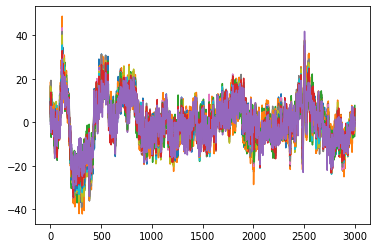

In [ ]:
Trial1=L1 [5000:8000]
plt.plot(L1[5000:8000])

# Correlacion entre los canales


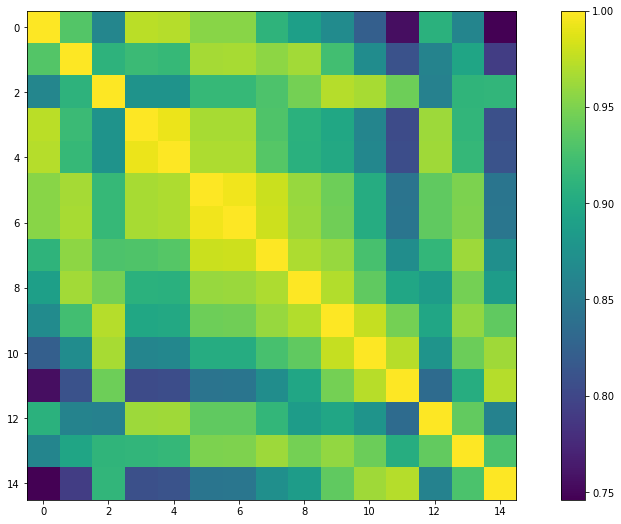

In [ ]:
plt.figure(figsize=(16,9))
covMatrix = np.corrcoef(L1.T )
plt.imshow(np.abs(covMatrix))
plt.colorbar()

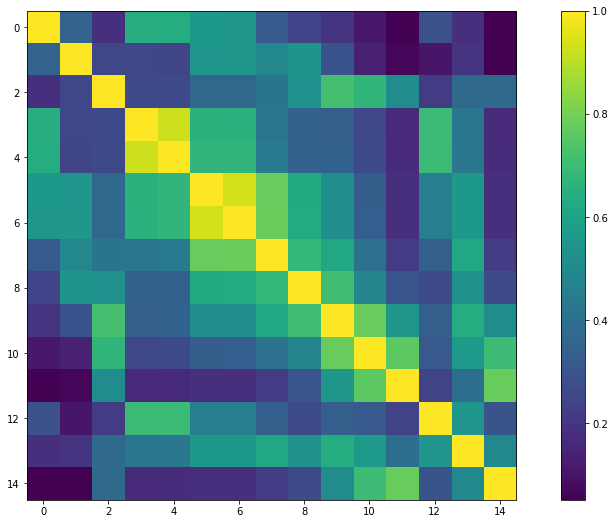

In [ ]:
from scipy.spatial.distance import pdist


def gausker(x1,x2,sigma):
    dist = np.linalg.norm(x1-x2)
    return np.exp(-dist**2/(2.*(sigma**2.)))


data = L1.T

matrix = np.zeros((15,15))

s = data.std()
s =1000
for i in range(15):
    for j in range(15):
      matrix[i,j] = gausker(data[i],data[j],s)

plt.figure(figsize=(16,9))
plt.imshow(matrix)
plt.colorbar()
plt.show()

In [ ]:
#Distancia que hay entre uno y otro canal. 

# **Transformada de Karhunen Loeve (KLT)**

Le saco la transformada de Karhunen Loeve a un trials de mis datos.


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


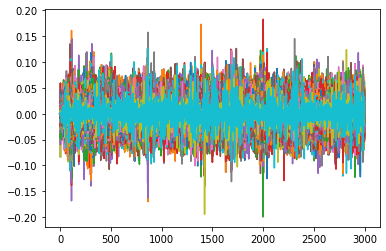

In [ ]:
def KLT(a):
    """
    Returns Karhunen Loeve Transform of the input and the transformation matrix and eigenval
    
    Ex:
    import numpy as np
    a  = np.array([[1,2,4],[2,3,10]])
    
    kk,m = KLT(a)
    print kk
    print m
    
    # to check, the following should return the original a
    print np.dot(kk.T,m).T
        
    """
    val,vec = np.linalg.eig(np.cov(a))
    klt = np.dot(vec,a)
    return klt,vec,val
kk,m,val,=KLT (Trial1);
plt.plot(m);

In [ ]:
#Grafica del valor propio en cada punto. 


In [ ]:
#kk: ttransformada de Karhunen Loeve 
#m:valores propios


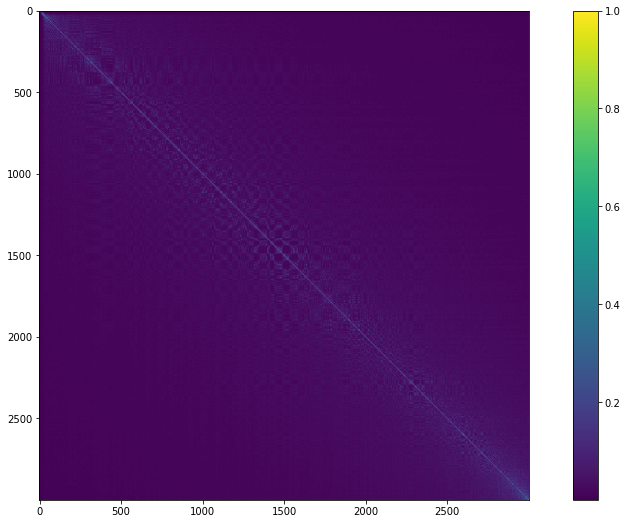

In [ ]:
plt.figure(figsize=(16,9))
covMatrix = np.corrcoef(m.T)
plt.imshow(np.abs(covMatrix))
plt.colorbar()

In [ ]:
#correlacion de los valores propios.

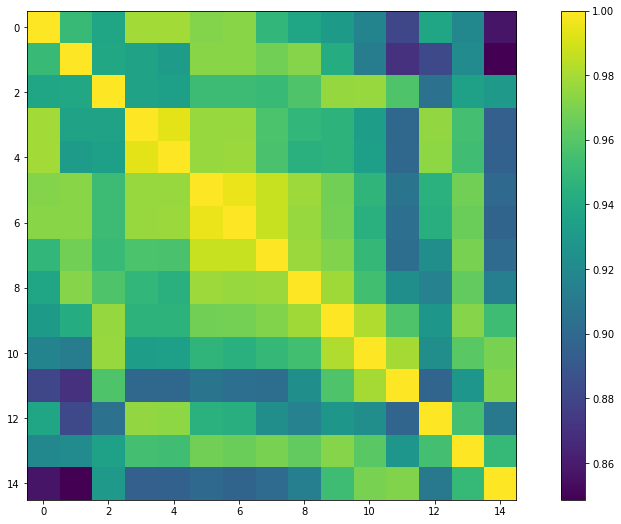

In [ ]:
plt.figure(figsize=(16,9))
covMatrix = np.corrcoef(kk.T)
plt.imshow(np.abs(covMatrix))
plt.colorbar()

In [ ]:
#correlacion de la transformada de Karhunen

# **Serie  de fourier**

In [ ]:
Trial1.T.shape

(15, 3000)

In [ ]:
Trial_mean = np.mean(Trial1.T,0)
Trial_mean.reshape((-1,1))

array([[ 6.01728147],
       [12.21073427],
       [ 9.26915757],
       ...,
       [ 0.24590199],
       [ 1.94012769],
       [ 3.7573376 ]])

In [ ]:
import math as mat
fs=512 # frecuencia de muestreo.
Ts=1/fs# paso de las muestras
t =np.arange(5000/fs,8000/fs, Ts)
N = 3000
x = Trial1

In [ ]:
Tr_ch = list()
for ch in range(0,1): # x.shape[1]
  Tf = list()
  for k in range(0,N-1):      
    Tf_k = list()
    for n in range(0,N-1):
      Tf_k.append(x[n,ch]*(np.cos((2*mat.pi/N)*k*n)-1j*np.sin((2*mat.pi/N)*k*n)))
    Tf.append(sum(Tf_k)/n)
  Tr_ch.append(Tf_k)

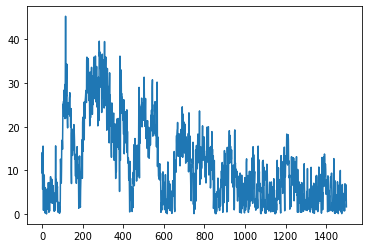

In [ ]:
ch_ = 0
dat = np.asarray(Tr_ch[ch_]).reshape(-1,1)

plt.plot(abs(dat[0:1501]))

# Ejercicio hecho en clase 


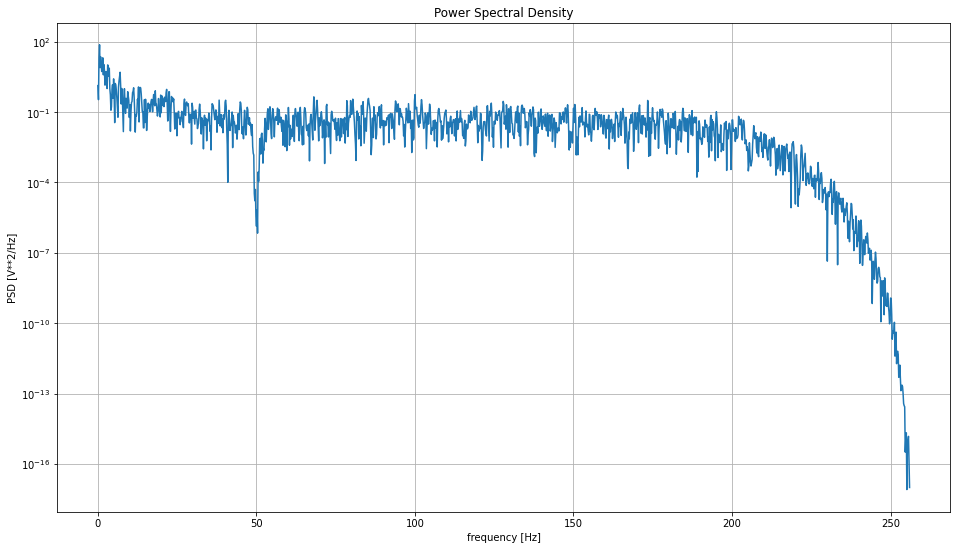

In [ ]:
from scipy import signal
fs, T_den = signal.welch(Trial1.T[0], 512, nperseg=3000)
plt.figure(figsize=(16,9))
plt.semilogy(fs,T_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.grid()
plt.title('Power Spectral Density')
plt.show()

In [ ]:
from scipy.fftpack import fft, ifft, fftfreq, fftshift


def fourier_series(signal):
  TTT = fftshift(fft(signal)/signal.shape[1]**2)
  omega=fftshift(fftfreq(TTT.shape[0], 1/512))

  plt.figure(figsize=(10,7))
  plt.plot(np.abs(TTT))
  plt.xlim(-32,32)
  plt.grid()
  plt.xlabel('$\omega$')
  plt.ylabel('Magnitude')
  plt.title('Cn')
  plt.show()
  x=np.zeros(15)
  y=np.zeros(15)
  for i in range (0,signal.shape[0]):
    x[i]= np.abs(np.mean(TTT[i]))
    y[i]=np.var(TTT[i])
  plt.figure()
  plt.stem(x)
  plt.stem(y)

  return (TTT,x,y)

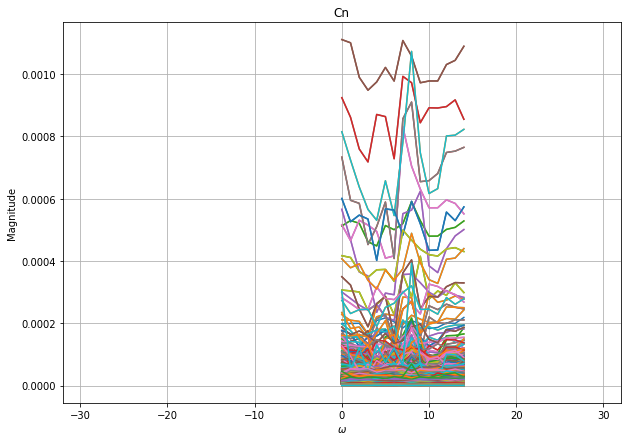

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


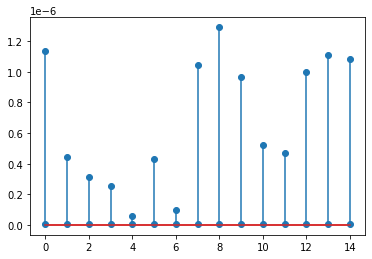

In [ ]:
FULL,means,var=fourier_series(Trial1.T)

<function matplotlib.pyplot.show>

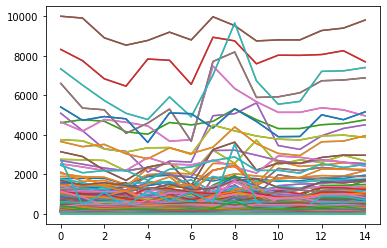

In [ ]:
plt.figure()
plt.plot(np.abs(fftshift(fft(Trial1.T))))
plt.show

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

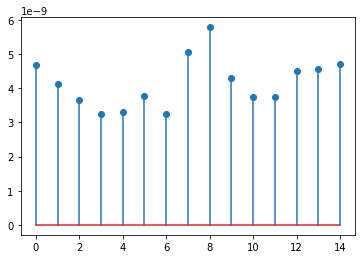

In [ ]:
plt.stem(var)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """Entry point for launching an IPython kernel.


<StemContainer object of 3 artists>

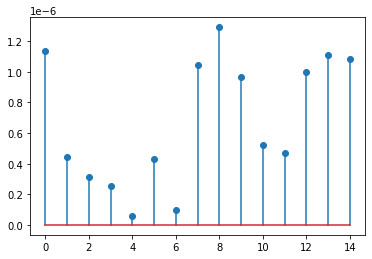

In [ ]:
plt.stem(means)

<function matplotlib.pyplot.show>

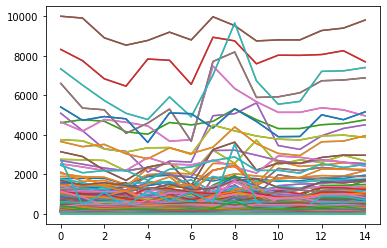

In [ ]:
plt.figure()
plt.plot(np.abs(fftshift(fft(Trial1.T))))
plt.show

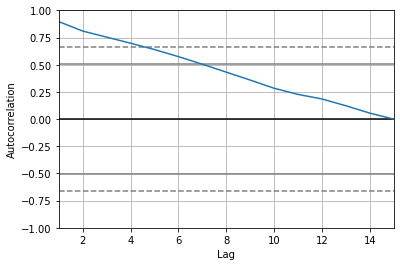

In [ ]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
autocorrelation_plot(Trial1.T)

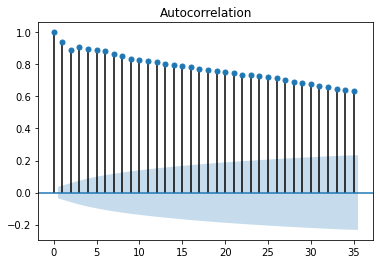

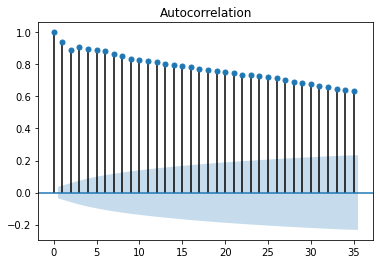

In [ ]:
plot_acf(Trial1.T[0])

# Autoregresión

In [ ]:
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


time = np.arange(-1,1,0.01)

var = 1
mue = 0
noise = mue + np.sqrt(var)*np.random.randn(time.shape[0])
amplitud = 0*time + noise 


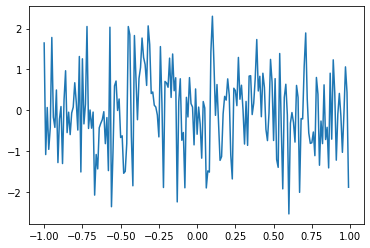

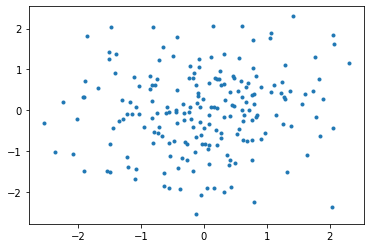

In [ ]:
X = amplitud[:-1]
y = amplitud[1:]

plt.figure()
plt.plot(time,amplitud)
plt.figure()
plt.plot(X,y,'.')

In [ ]:
X.shape, y.shape, amplitud.shape

((199,), (199,), (200,))

In [ ]:
train_size = int(len(X) * 0.80)

In [ ]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [ ]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr.coef_, lr.intercept_

(array([0.11749832]), 0.021496671016691324)

# Entropia vs energia

In [ ]:
Eg = Trial1.T

(15, 3000)

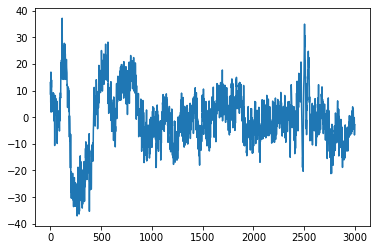

In [ ]:
x=Eg[2]
plt.plot(x)
Eg.shape


In [ ]:
pip install git+https://github.com/raphaelvallat/entropy.git

  Cloning https://github.com/raphaelvallat/entropy.git to /tmp/pip-req-build-ty647zyr
  Running command git clone -q https://github.com/raphaelvallat/entropy.git /tmp/pip-req-build-ty647zyr
  Created wheel for entropy: filename=entropy-0.1.2-cp36-none-any.whl size=15611 sha256=2d4badce41cd3ccfde99ec9dfae0b9293fb855ae6241c86b6211e9f34b7a6c4f
  Stored in directory: /tmp/pip-ephem-wheel-cache-y4z393rs/wheels/60/ed/d3/b715e38438f1f39edb1383aea79c578073953b25fa576fc71e
Successfully built entropy


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

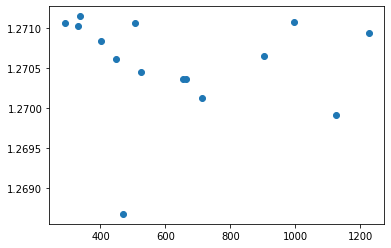

In [ ]:
##filtro better
from scipy.signal import butter, lfilter
from entropy import *

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz

# Sample rate and desired cutoff frequencies (in Hz).
fs = 512.0
lowcut = 8
highcut = 12



filter = [butter_bandpass_filter(Eg[i], lowcut, highcut, fs, order=6) for i in range(15)]
entropies = np.array( [perm_entropy(filter[i]) for i in range(15)])
power = np.array([np.linalg.norm(filter[i])/460 for i in range(15)])
plt.scatter(power, entropies)

from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(power.reshape(-1, 1), entropies.reshape(-1, 1))

In [ ]:
regressor.score(entropies.reshape(-1, 1), power.reshape(-1, 1))

-4.891156809833904

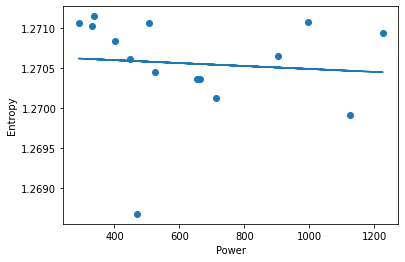

In [ ]:
ypred = regressor.predict(power.reshape(-1,1))
plt.plot(power,ypred)
plt.scatter(power,entropies )
plt.xlabel("Power")
plt.ylabel("Entropy")
plt.show()

In [ ]:
from scipy import stats
zentropies=stats.zscore(entropies.reshape(-1, 1))
zpower= stats.zscore(power.reshape(-1, 1))

In [ ]:
spear=stats.spearmanr(zentropies, zpower)

from scipy.special import kolmogorov
norm=stats.normaltest(entropies.reshape(-1, 1))
print(spear)
print(norm)

SpearmanrResult(correlation=-0.3214285714285714, pvalue=0.24271904680166836)
NormaltestResult(statistic=array([15.31101669]), pvalue=array([0.00047343]))


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
print(stats.normaltest(power))
print(stats.normaltest(entropies))
print(stats.normaltest(zpower))
print(stats.normaltest(zentropies))

NormaltestResult(statistic=2.0218509736459476, pvalue=0.3638820556386318)
NormaltestResult(statistic=15.311016689288508, pvalue=0.00047342912268383074)
NormaltestResult(statistic=array([2.02185097]), pvalue=array([0.36388206]))
NormaltestResult(statistic=array([15.31101669]), pvalue=array([0.00047343]))


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [ ]:
print(power.shape)
print(entropies.shape)

(15,)
(15,)


# Spearman-Pearson

In [ ]:
from scipy import stats
print(stats.spearmanr(power,entropies ))
print("")
print(stats.pearsonr(power,entropies ))

SpearmanrResult(correlation=-0.3214285714285714, pvalue=0.24271904680166836)

(-0.08492976490258904, 0.7634608939241897)


# Normal test

In [ ]:
print(stats.normaltest(power))
print(stats.normaltest(entropies))

NormaltestResult(statistic=2.0218509736459476, pvalue=0.3638820556386318)
NormaltestResult(statistic=15.311016689288508, pvalue=0.00047342912268383074)


/usr/local/lib/python3.6/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


# Chi2

In [ ]:
stat, p, dof, expected = stats.chi2_contingency(power,entropies)
print(p)
print(stat)
print(dof)

1.0
0.0
0


# Kendall

In [ ]:
print(stats.kendalltau(power,entropies))

KendalltauResult(correlation=-0.2571428571428572, pvalue=0.20184282422518202)


In [ ]:
L1= S01E['data'] [0] [0] [0] [0] [0] #CANALES*MUESTRAS 
L2= S01E['data'] [0] [2] [0] [0] [1]

In [ ]:
df=L1.T

(15, 112128)

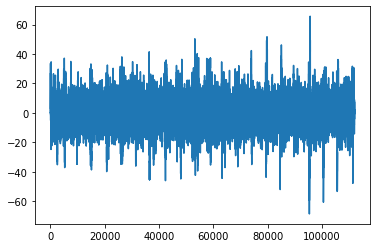

In [ ]:
x=df[2]
plt.plot(x)
df.shape


# Welch

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 15, using nperseg = 15
  .format(nperseg, input_length))


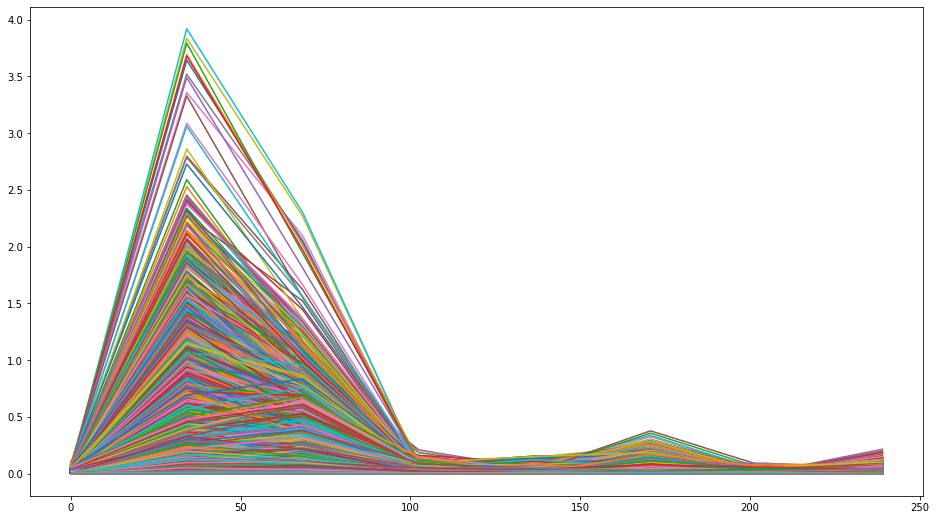

In [ ]:
from scipy import signal

f, Pxx_den = signal.welch(L1, fs=512)
plt.figure(figsize=(16,9))
plt.plot(f,Pxx_den.T );



# Plot Trial 

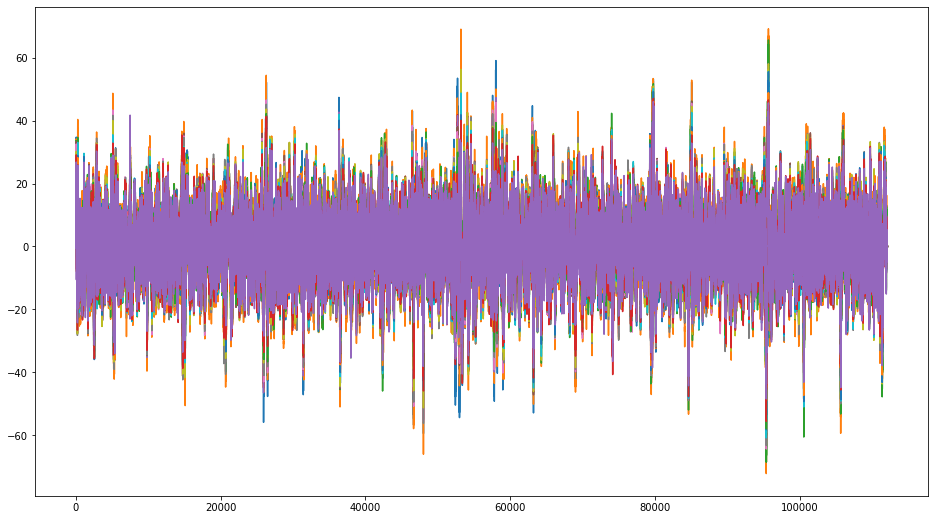

In [ ]:
plt.figure(figsize=(16,9))
plt.plot(S01E['data'] [0] [0] [0] [0] [0])
plt.show();